<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/test_02_classification_eyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Open_Closed_Eyes'

/content/drive/MyDrive/Colab Notebooks/Open_Closed_Eyes


In [ ]:
ls

drive/  sample_data/


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Open_Closed_Eyes/new_eyes_dataset.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
imageTest1 = tf.keras.preprocessing.image.load_img('/content/new_eyes_dataset/test/closed/25521.png')

In [ ]:
# imageTest1.getchannel('B')
imageTest1

In [ ]:
imageTest1.size

(29, 25)

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/new_eyes_dataset/test/open/40042.png')
# image
image.size

(29, 25)

## Train and test set

In [ ]:
training_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    # rotation_range = 10,
    brightness_range=[0.2,0.5],
    # zoom_range=[0.1,0.3],
    # width_shift_range=0.1,
    # height_shift_range=0.1,
)

training_dataset = training_generator.flow_from_directory(
    '/content/new_eyes_dataset/training',
    color_mode="grayscale",
    target_size=(25,29),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

Found 65526 images belonging to 2 classes.


In [ ]:
training_dataset.image_shape

(25, 29, 1)

In [ ]:
training_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.unique(training_dataset.classes, return_counts=True)

(array([0, 1], dtype=int32), array([25520, 40006]))

In [ ]:
training_dataset.class_indices

{'closed': 0, 'open': 1}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


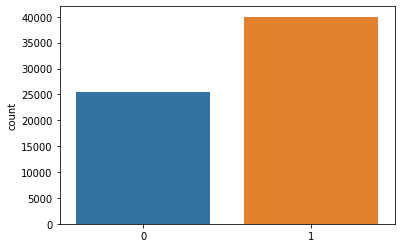

In [ ]:
sns.countplot(training_dataset.classes)

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(
    '/content/new_eyes_dataset/test',
    color_mode="grayscale",
    target_size=(25,29),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
)

Found 8400 images belonging to 2 classes.


## Building and training the CNN network 

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
num_detectors = 32
num_classes = 2
width, height = 29, 25
epochs = 50

network = Sequential()
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding='same', input_shape=(height, width, 1)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(num_detectors*2, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors*2, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(num_detectors*2*2, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors*2*2, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(num_detectors*2*2*2, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors*2*2*2, (3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPool2D(pool_size=(2,2)))
network.add(Dropout(0.2))

# network.add(Conv2D(num_detectors*2, (3,3), activation='relu', padding='same'))
# network.add(Conv2D(num_detectors*3, (3,3), activation='relu', padding='same'))
# network.add(BatchNormalization())

# network.add(MaxPool2D(pool_size=(2,2)))
# network.add(Dropout(0.2))

# network.add(Conv2D(num_detectors*3, (3,3), activation='relu', padding='same'))
# network.add(Conv2D(num_detectors*3, (3,3), activation='relu', padding='same'))
# network.add(BatchNormalization())

# network.add(MaxPool2D(pool_size=(2,2)))
# network.add(MaxPool2D(pool_size=(2,2)))
# network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(725, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(362, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 29, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 29, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 29, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 14, 64)        1

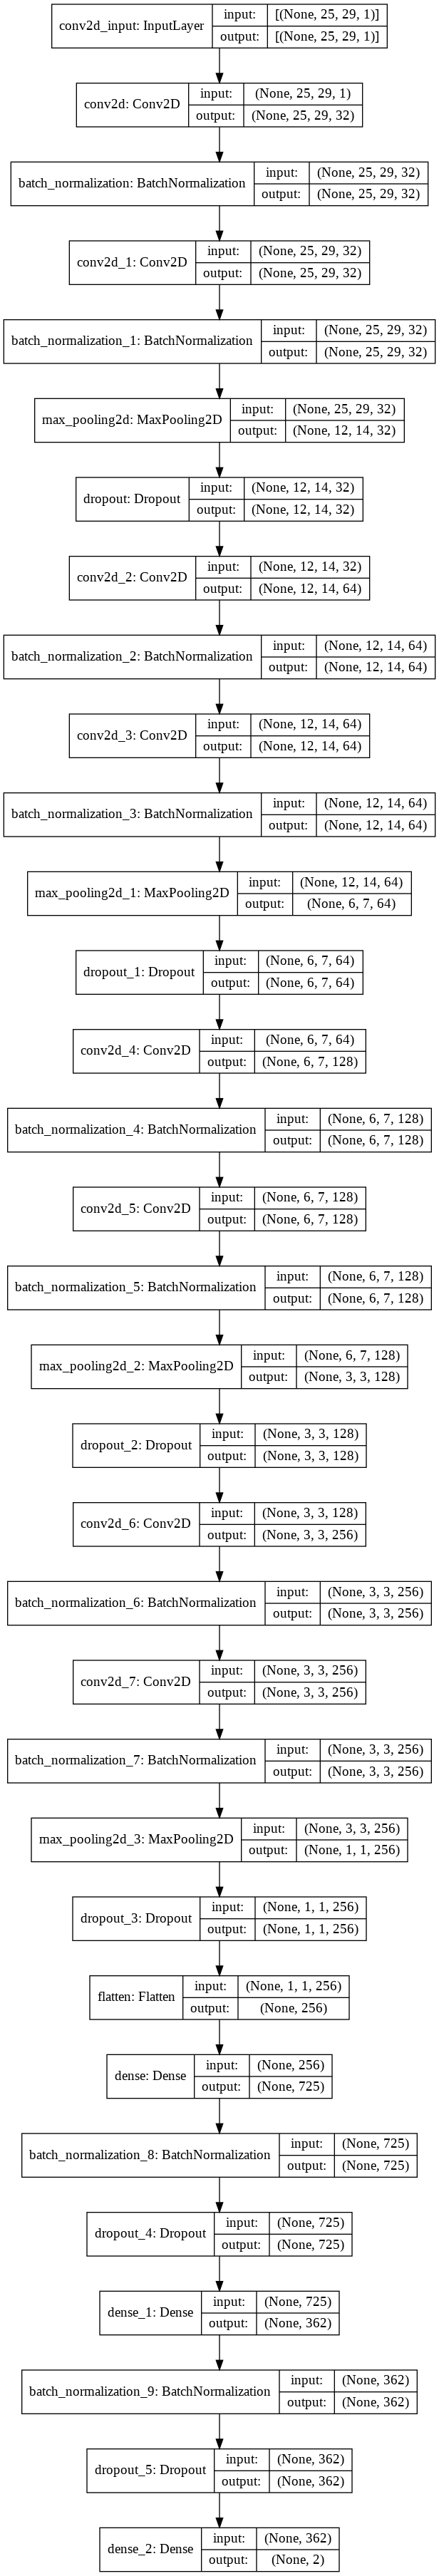

In [ ]:
plot_model(network, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "25x29_weights_GRAYSCALE.hdf5", verbose = 1, save_best_only=True)

In [ ]:
network.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = network.fit(training_dataset, epochs=epochs, batch_size=16, validation_data=test_dataset, callbacks=[checkpointer, earlystopping])

Epoch 1/50
4096/4096 [==============================] - 168s 34ms/step - loss: 0.1186 - accuracy: 0.9603 - val_loss: 2.4086 - val_accuracy: 0.4973

Epoch 00001: val_loss improved from inf to 2.40863, saving model to 25x29_weights_GRAYSCALE.hdf5
Epoch 2/50
4096/4096 [==============================] - 143s 35ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.9489 - val_accuracy: 0.6730

Epoch 00002: val_loss improved from 2.40863 to 0.94887, saving model to 25x29_weights_GRAYSCALE.hdf5
Epoch 3/50
4096/4096 [==============================] - 141s 34ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.4735 - val_accuracy: 0.8460

Epoch 00003: val_loss improved from 0.94887 to 0.47349, saving model to 25x29_weights_GRAYSCALE.hdf5
Epoch 4/50
4096/4096 [==============================] - 140s 34ms/step - loss: 0.0325 - accuracy: 0.9904 - val_loss: 0.3111 - val_accuracy: 0.8582

Epoch 00004: val_loss improved from 0.47349 to 0.31114, saving model to 25x29_weights_GRAYSCALE.hdf5
Epoch 5/

In [ ]:
model_json = network.to_json()
with open('25x29_architecture_GRAYSCALE.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
with open('/content/25x29_architecture_GRAYSCALE.json', 'r') as json_file:
    json_saved_model = json_file.read()

json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 25, 29, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 25, 29, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "c

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/25x29_weights_GRAYSCALE.hdf5')
network_loaded.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Saving model
network_loaded.save('25x29_GRAYSCALE_eyes.h5')

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/Open_Closed_Eyes/new_eyes_v2.h5
network_loaded = tf.keras.models.load_model('/content/25x29_GRAYSCALE_eyes.h5')

In [ ]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 29, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 25, 29, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 29, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 14, 64)        1

## Evaluating the Neural Netowork

In [ ]:
network_loaded.evaluate(test_dataset)

8400/8400 [==============================] - 51s 6ms/step - loss: 0.1203 - accuracy: 0.9620


[0.12031511962413788, 0.9620237946510315]

In [ ]:
predictions = network_loaded.predict(test_dataset)

In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions

array([1, 1, 0, ..., 1, 0, 0])

In [ ]:
test_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.6991666666666667

In [ ]:
test_dataset.class_indices

{'closed': 0, 'open': 1}

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
cm

array([[ 289, 1111],
       [1416, 5584]])

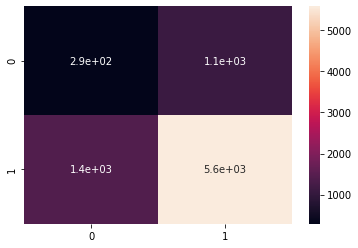

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.17      0.21      0.19      1400
           1       0.83      0.80      0.82      7000

    accuracy                           0.70      8400
   macro avg       0.50      0.50      0.50      8400
weighted avg       0.72      0.70      0.71      8400



Classifying one image

In [ ]:
img_test = cv2.imread('/content/new_eyes_dataset/test/open/40044.png')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
print(img_test.shape)
cv2_imshow(img_test)

img_test = img_test / 255

img_test = np.expand_dims(img_test, axis=[0, -1])
# img_test = np.expand_dims(img_test, axis=-1)
print(img_test.shape)
print(test_dataset.class_indices)

probs = network_loaded.predict(img_test)
print(probs)
result = np.argmax(probs)
print(result)

(25, 29)


(1, 25, 29, 1)
{'closed': 0, 'open': 1}
[[0.00192701 0.998073  ]]
1


# Optimizing model

## Transformando a TFLITE

In [ ]:
# /content/drive/MyDrive/Colab Notebooks/Open_Closed_Eyes/new_eyes_v2.h5
network_loaded = tf.keras.models.load_model('/content/25x29_GRAYSCALE_eyes.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(network_loaded)
tflite_model = converter.convert()
open('/content/25x29_GRAYSCALE_eyes/25x29_GRAYSCALE_eyes2.tflite', "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8bydf6n5/assets


INFO:tensorflow:Assets written to: /tmp/tmp8bydf6n5/assets


6505896

## Cuantizando el modelo

In [ ]:
import pathlib
tflite_models_dir = pathlib.Path("25x29_GRAYSCALE_eyes/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

# Convert into TFLite model and convert with DEFAULT (dynamic range) quantization
converter = tf.lite.TFLiteConverter.from_keras_model(network_loaded)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16] # NEW
# tflite_model = converter.convert()

tflite_fp16_model = converter.convert()
tflite_model_fp16_file = tflite_models_dir/"25x29_GRAYSCALE_eyes.tflite"
tflite_model_fp16_file.write_bytes(tflite_fp16_model)

INFO:tensorflow:Assets written to: /tmp/tmpg7703i9t/assets


INFO:tensorflow:Assets written to: /tmp/tmpg7703i9t/assets


3264880

In [ ]:
open("/content/new_eyes_v2_OPTIMIZED.tflite", "wb").write(tflite_model)

572160

In [ ]:
# Load TFLite model and see some details about input/output

tflite_interpreter = tf.lite.Interpreter(model_path='/content/25x29_GRAYSCALE_eyes/25x29_GRAYSCALE_eyes.tflite')

tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: conv2d_input
shape: [ 1 25 29  1]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 2]
type: <class 'numpy.float32'>


# Evaluating optimized model

In [ ]:
import pandas as pd

In [ ]:
img_test = cv2.imread('/content/new_eyes_dataset/test/closed/25576.png')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)
# img_test = np.float32(img_test)
print(img_test.shape)
cv2_imshow(img_test)

img_test = img_test / 255

img_test = np.expand_dims(img_test, axis=[0,-1]).astype(np.float32)
# img_test = np.expand_dims(img_test, axis=-1)
print(img_test.shape)
# print(test_dataset.class_indices)

# probs = network_loaded.predict(img_test)
# print(probs)
# result = np.argmax(probs)
# print(result)






tflite_interpreter.set_tensor(input_details[0]['index'], img_test)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
# print("Prediction results shape:", tflite_model_predictions.shape)
print()
print(tflite_model_predictions[0])

results = np.squeeze(tflite_model_predictions)
print()
print(np.argmax(results))
print()

tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
tflite_pred_dataframe.columns = ['0:closed','1:open']

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head()

(25, 29)


(1, 25, 29, 1)

[0.9939154  0.00608462]

0

TFLite prediction results for the first elements


,0:closed,1:open
0,0.993915,0.006085
